In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, Select
from IPython.display import display

In [2]:
df= pd.read_csv('datasets\dataset.csv')

In [3]:
df=df.sort_values(by=['user_id','date_created'])

In [4]:
if 'keep_drop' not in df.columns:
    df['source'] = df['book'] + "_" + df['chapter']
    df['target'] = df['source'].shift(-1)
    df['from'] = df['source'].shift(1)
    df['user_next'] = df['user_id'].shift(-1)
    df['user_prev'] = df['user_id'].shift(1)
    df.loc[df['user_id'] != df['user_next'], 'target'] = 'last'
    df.loc[df['user_id'] != df['user_prev'], 'from'] = 'first'
    
    df['same'] = df['source'] == df['target']
    df['pair'] = df['user_id'].astype(str) + "#" + df['source'] + "#" + df['target']
#     df['keep_drop'] = np.where((df['user_next'] == df['user_id']), df['user_id'], np.nan)
#     df=df.dropna(subset=["keep_drop"])
#     df.loc[:, ['user_next', 'user_prev', 'keep_drop']] = \
#         df.loc[:, ['user_next', 'user_prev', 'keep_drop']].astype(np.int64, copy=True)
else:
    print('already done')

In [5]:
df[['user_id', 'book', 'chapter', 'from', 'source', 'target', 'same']]

,user_id,book,chapter,from,source,target,same
0,-2147277864,bhargava,chapter-8,first,bhargava_chapter-8,last,False
1,-2146355313,fain3,chapter-8,first,fain3_chapter-8,ramamurthy_chapter-1,False
2,-2146355313,ramamurthy,chapter-1,fain3_chapter-8,ramamurthy_chapter-1,thomas_chapter-1,False
3,-2146355313,thomas,chapter-1,ramamurthy_chapter-1,thomas_chapter-1,last,False
4,-2146168866,prasanna,about-this-book,first,prasanna_about-this-book,last,False
...,...,...,...,...,...,...,...
4990,-2019295583,roestenburg,chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,True
4991,-2019295583,roestenburg,chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,True
4992,-2019295583,roestenburg,chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,True
4993,-2019295583,roestenburg,chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,roestenburg_ chapter-1,True


In [ ]:
if 'keep_drop' not in df.columns:
    df["target"]= df["source"].shift(-1)  
    df["user_next"]= df["user_id"].shift(-1)
    df['keep_drop'] = np.where((df['user_next'] == df['user_id']), df['user_id'], np.nan)
#     df=df.dropna(subset=["keep_drop"])
#     df.loc[:, ['user_next', 'keep_drop']] = df.loc[:, ['user_next', 'keep_drop']].astype(np.int64, copy=True)
else:
    print('already done')

<AxesSubplot:>

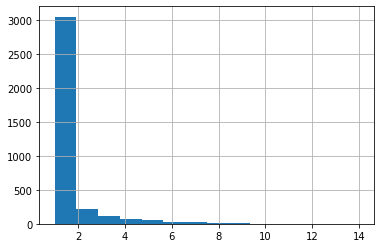

In [6]:
df.groupby(['user_id', 'pair'])['source'].count().hist(bins=14)

In [7]:
    df.drop_duplicates(subset=['pair'], keep='first', inplace=True)
#     df = df[~df.same]
    df.drop(labels=['pair', 'user_next', 'user_prev'], axis='columns', inplace=True)

# with last

In [8]:
G=nx.from_pandas_edgelist(df, 'source', 'target', create_using=nx.DiGraph)

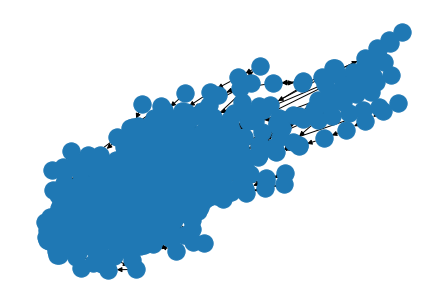

In [9]:
nx.draw(G)

In [14]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1477
Number of edges: 3212
Average in degree:   2.1747
Average out degree:   2.1747


# with first and last

In [18]:
edgelist2 = set()
G2 = nx.DiGraph()
for from_, source, target in df[['from', 'source','target']].values:
    edgelist2.add((source, target))
    if from_ == 'first':
        edgelist.add((from_, source))
G2.add_edges_from(edgelist2)

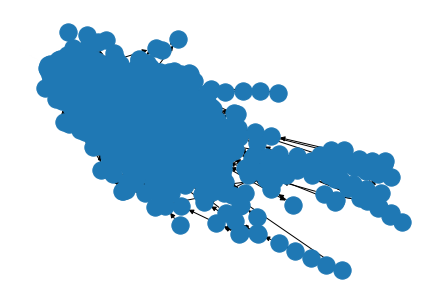

In [20]:
nx.draw(G2)

In [23]:
print(nx.info(G2))

Name: 
Type: DiGraph
Number of nodes: 1477
Number of edges: 3212
Average in degree:   2.1747
Average out degree:   2.1747


# only full edges

In [19]:
edgelist3 = set()
G3 = nx.DiGraph()
for source, target in df[['source','target']].values:
    if target != 'last':
        edgelist3.add((source, target))
G3.add_edges_from(edgelist3)

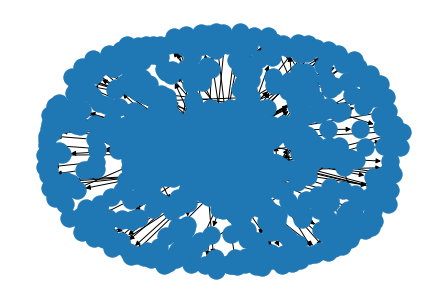

In [21]:
nx.draw(G3)

In [22]:
print(nx.info(G3))

Name: 
Type: DiGraph
Number of nodes: 1403
Number of edges: 2694
Average in degree:   1.9202
Average out degree:   1.9202


In [27]:
df['from'].value_counts()

first                     641
richardson3_ chapter-1     17
siriwardena_ chapter-1     17
windmill_ chapter-2        15
noback_ chapter-1          15
                         ... 
jones_ about-this-book      1
seemann2_ chapter-7         1
atencio_ chapter-1          1
posta2_ chapter-7           1
harrison_chapter-4          1
Name: from, Length: 1307, dtype: int64

In [28]:
df['target'].value_counts()

last                      641
richardson3_ chapter-1     17
windmill_ chapter-2        14
lauret_ chapter-1          13
siriwardena_ chapter-1     13
                         ... 
sotobueno_ preface          1
atencio_ chapter-5          1
carroll_ chapter-2          1
terrell_ chapter-14         1
madden_ chapter-4           1
Name: target, Length: 1328, dtype: int64